# Visualizing traffic congestion data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import geopandas as gpd

# Standard plotly imports
import plotly.graph_objs as go
from ipywidgets import widgets
# from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
# from chart_studio.plotly import plot, iplot
#import cufflinks
#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)

from IPython.display import display

In [9]:
# import the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#print(train_df.head())

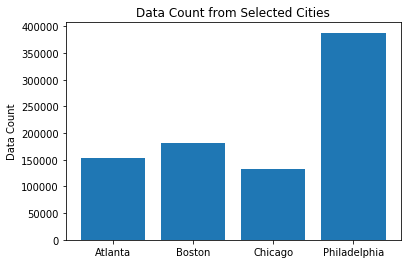

In [74]:
# split df by city
atlanta = train_df[train_df['City'] == 'Atlanta']
boston = train_df[train_df['City'] == 'Boston']
chicago = train_df[train_df['City'] == 'Chicago']
philadelphia = train_df[train_df['City'] == 'Philadelphia']

def data_count(df_list):
    data_count = []
    cities = []
    for df in df_list:
        data_count.append(df.shape[0])
        cities.append(df['City'].iloc[0])

    data_count = np.array(data_count)
    #print(data_count)
    plt.bar(cities, data_count)
    plt.title('Data Count from Selected Cities')
    plt.ylabel('Data Count')
    plt.show()

data_count([atlanta, boston, chicago, philadelphia])
            

In [27]:
# for a selected city or multiple city describe the data
def data_summary(df_list):
    # check how many cities and create a df of all selected cities
    if len(df_list) > 1:
        complete_df = pd.concat(df_list, axis=0)
    else:
        complete_df = df_list[0]
        
    # use pythons describe method
    describe_table = complete_df.describe().transpose().reset_index()

    # add values such as missing values and unique values
    add_summary = pd.DataFrame(complete_df.dtypes)
    add_summary = add_summary.reset_index()
    add_summary.columns = ['index', 'dtype']
    add_summary['Missing'] = complete_df.isnull().sum().values
    add_summary['Unique'] = complete_df.nunique().values

    # combine both tables

    complete_summary = pd.merge(add_summary,describe_table, 
                               on='index', how='outer')
    #print(complete_summary)
    return complete_summary

data_summary([atlanta])
#boston.describe().transpose().reset_index()

,index,dtype,Missing,Unique,count,mean,std,min,25%,50%,75%,max
0,RowId,int64,0,153363,153363.0,1.997016e+06,44272.229004,1.920335e+06,1.958676e+06,1.997016e+06,2.035356e+06,2073697.000
1,IntersectionId,int64,0,377,153363.0,2.642227e+02,144.891429,0.000000e+00,1.450000e+02,2.700000e+02,3.800000e+02,520.000
2,Latitude,float64,0,352,153363.0,3.376832e+01,0.033059,3.364997e+01,3.375175e+01,3.377128e+01,3.378840e+01,33.835
3,Longitude,float64,0,361,153363.0,-8.439191e+01,0.040105,-8.453519e+01,-8.440729e+01,-8.438900e+01,-8.436868e+01,-84.291
4,EntryStreetName,object,3132,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ExitStreetName,object,2476,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,EntryHeading,object,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ExitHeading,object,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hour,int64,0,24,153363.0,1.267857e+01,6.586600,0.000000e+00,8.000000e+00,1.300000e+01,1.800000e+01,23.000
9,Weekend,int64,0,2,153363.0,3.621278e-01,0.480617,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000


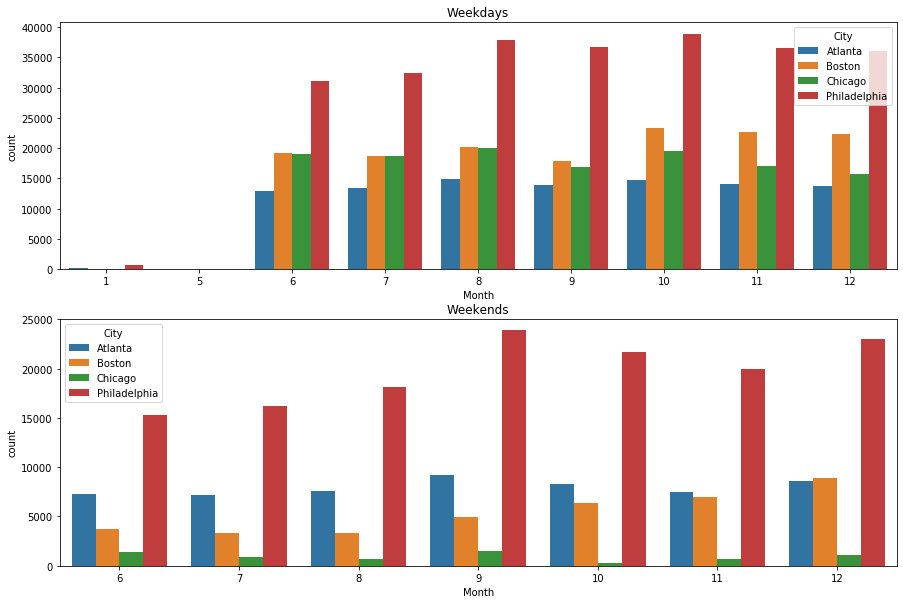

In [76]:
# function for all or selected cities when combining dfs to show the counts
def count_plot_time(df_list, time):
    # check how many cities
    if len(df_list) > 1:
        complete_df = pd.concat(df_list, axis=0)
    else:
        complete_df = df_list[0]
    
    # create the plot
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    sns.countplot(data=complete_df[complete_df['Weekend'] == 0],
                  hue='City', x=time, ax = axs[0])
    sns.countplot(data=complete_df[complete_df['Weekend'] == 1],
                  hue='City', x=time, ax = axs[1])
    # add labels
    axs[0].set_title('Weekdays')
    axs[1].set_title('Weekends')

count_plot_time([atlanta, boston, chicago, philadelphia], 'Month')

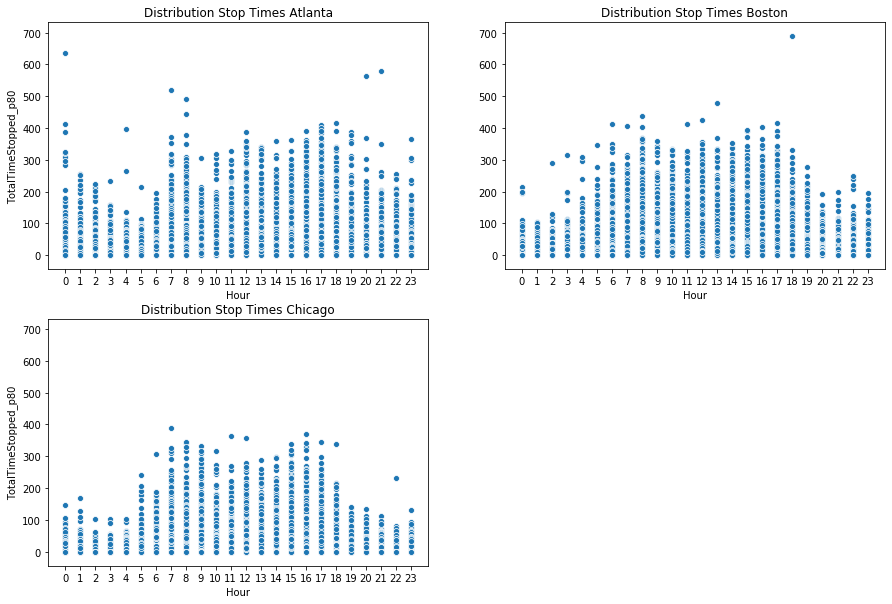

In [73]:
# distribution of stoppage times per hour of day
def scatter_waiting_time(df_list):
    
    # create ticks for the hours
    x_ticks = np.arange(24)
    
    # create subplots based on how many cities selected
    if len(df_list) == 1:
        fig = plt.figure(1, figsize=(9, 6))
        ax = fig.add_subplot(111)
        sns.scatterplot(df_list[0]['Hour'], df_list[0]['TotalTimeStopped_p80'], ax=ax)
        ax.set_title('Distribution Stop Times ' + df_list[0]['City'].iloc[0])
        ax.set_xticks(x_ticks)
        return 0
    if len(df_list) == 2:
        fig, axs = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
        sns.scatterplot(df_list[0]['Hour'], df_list[0]['TotalTimeStopped_p80'], ax=axs[0])
        axs[0].set_title('Distribution Stop Times ' + df_list[0]['City'].iloc[0])
        axs[0].set_xticks(x_ticks)
        sns.scatterplot(df_list[1]['Hour'], df_list[1]['TotalTimeStopped_p80'], ax=axs[1])
        axs[1].set_title('Distribution Stop Times ' + df_list[1]['City'].iloc[0])
        axs[1].set_xticks(x_ticks)
        return 0
    if len(df_list) == 3:
        fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
        fig.delaxes(axs[1][1])
        sub_rows = 0
    if len(df_list) == 4:
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))
        sub_rows = 0
    
    # i parameter to keep track of what row to plot in
    i = sub_rows
    for idx, df in enumerate(df_list):
        data_idx = idx
        
        # reset the index to plot in first or second column
        if idx == 2:
            idx=0
        if idx == 3:
            idx=1
            
        # make the plot
        sns.scatterplot(df_list[data_idx]['Hour'], df_list[data_idx]['TotalTimeStopped_p80'], ax=axs[i][idx])
        axs[i][idx].set_title('Distribution Stop Times ' + df_list[data_idx]['City'].iloc[0])
        axs[i][idx].yaxis.set_tick_params(labelbottom=True)
        axs[i][idx].set_xticks(x_ticks)
        
        # switch to next row
        if idx == 1:
            i = 1
        
scatter_waiting_time([atlanta, boston, chicago])   

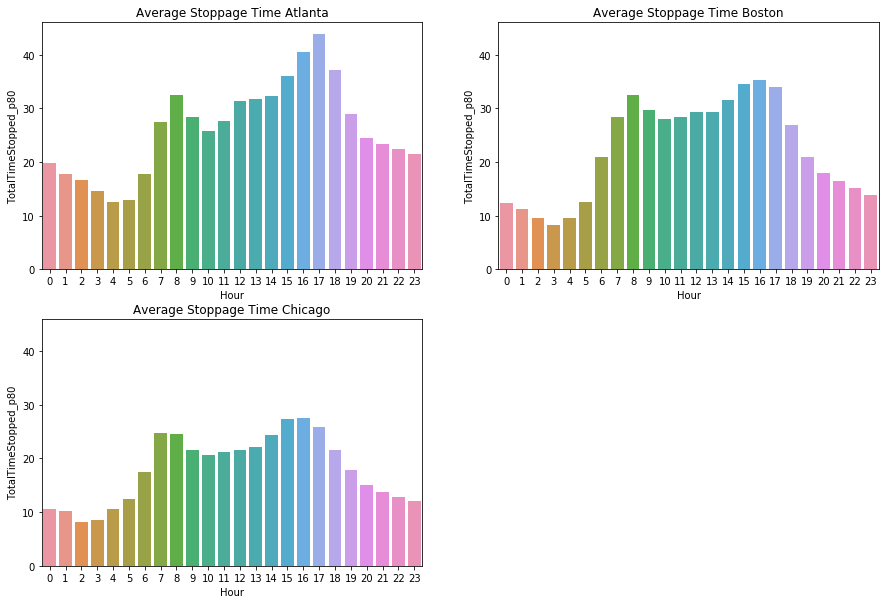

In [70]:
# average stoppage times
# distribution of stoppage times per hour of day
def average_waiting_time(df_list):
    
    # create ticks for the hours
    # x_ticks = np.arange(24)
    
    # create subplots based on how many cities selected
    if len(df_list) == 1:
        fig = plt.figure(1, figsize=(9, 6))
        ax = fig.add_subplot(111)
        city_hours = df_list[0].groupby('Hour')['TotalTimeStopped_p80'].mean().reset_index()
        print(city_hours)
        sns.barplot(city_hours['Hour'], city_hours['TotalTimeStopped_p80'], ax=ax)
        ax.set_title('Average Stoppage Time ' + df_list[0]['City'].iloc[0])
        #ax.set_xticks(x_ticks)
        return 0
    if len(df_list) == 2:
        # set up graph
        fig, axs = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
        
        # plot first graph
        city_hours_1 = df_list[0].groupby('Hour')['TotalTimeStopped_p80'].mean().reset_index()
        sns.barplot(city_hours_1['Hour'], city_hours_1['TotalTimeStopped_p80'], ax=axs[0])
        axs[0].set_title('Average Stoppage Time ' + df_list[0]['City'].iloc[0])
        #axs[0].set_xticks(x_ticks)
        
        # plot second graph
        city_hours_2 = df_list[1].groupby('Hour')['TotalTimeStopped_p80'].mean().reset_index()
        sns.barplot(city_hours_2['Hour'], city_hours_2['TotalTimeStopped_p80'], ax=axs[1])
        axs[1].set_title('Average Stoppage Time ' + df_list[1]['City'].iloc[0])
        #axs[1].set_xticks(x_ticks)
        
        return 0
    if len(df_list) == 3:
        fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
        #fig.subplots_adjust(wspace=0.2, hspace=0.4)
        # delete bottom right plot
        fig.delaxes(axs[1][1])
        sub_rows = 0
    if len(df_list) == 4:
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))
        #fig.subplots_adjust(wspace=0.2, hspace=0.2)
        sub_rows = 0
    
    # i parameter to keep track of what row to plot in
    i = sub_rows
    for idx, df in enumerate(df_list):
        # separate data index to go through list
        data_idx = idx

        # reset the index to plot in first or second column
        if idx == 2:
            idx=0
        if idx == 3:
            idx=1
            
        # get the needed data
        city_hours = df_list[data_idx].groupby('Hour')['TotalTimeStopped_p80'].mean().reset_index()
        # make the plot
        sns.barplot(city_hours['Hour'], city_hours['TotalTimeStopped_p80'], ax=axs[i][idx])
        axs[i][idx].set_title('Average Stoppage Time ' + df_list[data_idx]['City'].iloc[0])
        axs[i][idx].yaxis.set_tick_params(labelbottom=True)
        #axs[i][idx].set_xticks(x_ticks)
        
        # switch to next row
        if idx == 1:
            i = 1
            
average_waiting_time([atlanta, boston, chicago])

In [75]:
# select one city for a map
import folium

# function to create new colors based on stop time value
    

def city_map(df):
    df = df.sample(500)
    # create a new column with quartiles that can serve as color selection
    # problem is that it creates duplicate quartile ranges
    # df['StopTime_Quartile'] = pd.qcut(df['TotalTimeStopped_p80'], 4, labels=False)
    col = 'TotalTimeStopped_p80'
    conditions = [df[col] <= 10,
                 (df[col] > 10) & (df[col] <= 20),
                 (df[col] > 20) & df[col] <= 40,
                 df[col] > 40]
    choices = [0, 1, 2, 3]
    df['StopColors'] = np.select(conditions, choices, default=np.nan)
    # create dictionary for colors
    colors = {0: 'blue', 1: 'green', 2: 'orange', 3: 'red'}
    mean_lat = df['Latitude'].mean()
    mean_long = df['Longitude'].mean()
    city_map = folium.Map(location=[mean_lat, mean_long], zoom_start=11)
    
    for lat, long, size, color_range in zip(df['Latitude'], df['Longitude'], df['TotalTimeStopped_p80'], df['StopColors']):
        folium.CircleMarker([lat, long], radius=1, color=colors[color_range],
                            threshold_scale=[0,1,2,3], fill=True).add_to(city_map)
    
    return city_map
    
city_map(atlanta)
    


In [26]:
# try something new...
# widget to control df output by city
def unique_values_ALL(df, column):
    unique = df[column].unique().tolist()
    unique.sort()
    unique.insert(0, 'ALL')
    return unique
#unique_values_ALL(train_df, 'City')
dropdown_city = widgets.Dropdown(options=unique_values_ALL(train_df, 'City'))

output_city = widgets.Output()
# when all is selected display all data, otherwise apply filter
def dropdown_city_handler1(change):
    # clear output
    output_city.clear_output()
    # check with filter
    with output_city:
        if(change.new == 'ALL'):
            display(train_df)
        else:
            display(train_df[train_df['City'] == change.new])

# bind the handler to the dropdown
dropdown_city.observe(dropdown_city_handler1, names='value')

# display
display(dropdown_city)
        

Dropdown(options=('ALL', 'Atlanta', 'Boston', 'Chicago', 'Philadelphia'), value='ALL')

In [27]:
# call display here to put the changing output in this cell
display(output_city)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '          RowId  IntersectionId  Latit…

In [34]:
# make a second filter 
dropdown_hour = widgets.Dropdown(options=unique_values_ALL(train_df, 'Hour'))
# two filter output
output = widgets.Output()
# write a function to include both filters
def common_filter(city, hour):
    output.clear_output()
    
    # possible configurations of dropdowns
    if (city == 'ALL') & (hour == 'ALL'):
        common_filter = train_df
    elif (city == 'ALL'):
        common_filter = train_df[train_df['City'] == city]
    elif (hour == 'ALL'):
        common_filter = train_df[train_df['Hour'] == hour]
    else:
        common_filter = train_df[(train_df['City'] == city) & 
                                 (train_df['Hour'] == hour)]
    
    with output:
        display(common_filter)
        
# functions for handling the filters
def dropdown_city_handler(change):
    common_filter(change.new, dropdown_city.value)

def dropdown_hour_handler(change):
    common_filter(change.new, dropdown_hour.value)

# bind handlers to dropdowns
dropdown_city.observe(dropdown_city_handler, names='value')

dropdown_hour.observe(dropdown_hour_handler, names='value')

# display
display(dropdown_city)
display(dropdown_hour)

Dropdown(index=1, options=('ALL', 'Atlanta', 'Boston', 'Chicago', 'Philadelphia'), value='Atlanta')

Dropdown(options=('ALL', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)…